In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [10]:
file = 'housing.csv'
df = pd.read_csv(file)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `ocean_proximity` is contains textual data and they are repetitive, so it can be treated as categorical data. Let's count the value of each category. 

In [15]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


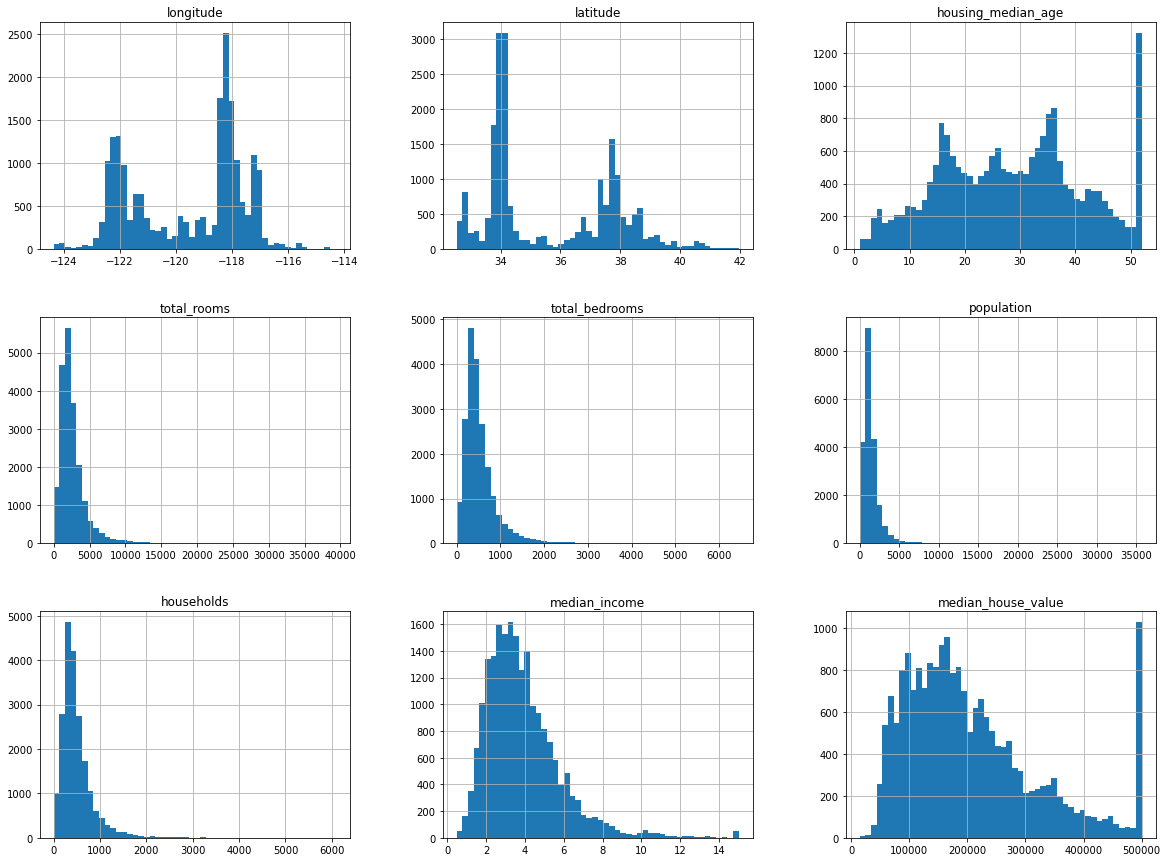

In [22]:
# Let's plot histogram for each attributes
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

It is a good idea to separate the test set at this stage to make sure that our model will never see the data. There are various ways to split the data, but we will use `train_test_split` method provided by scikit learn.

In [44]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size= 0.2, random_state=42) # we are using 80-20 split and random_state= 42 to make sure we get same set every time we refresh this line of code

In [25]:
test_df.shape   # 20640 x 0.20 = 4,128

(4128, 10)

If one feature or an attribute is extremely important in predicting the target variable, then we need to make sure that there is uniform data distribution of that feature in the test data as well. Let's say median_income is that feature, as we see in the histogram plot above that majority of data are clustered around 0.5 -6. Here, we need to make sure the test data also contains many instances of the same range. This is called ***stratified sampling***. In other words, no sampling bais. This is why we are going to use this technique to split our database.

First, we divide the attribute into five categories using `pd.cut()`. This function is useful for going from a continuous variable to a categorical variable.

<AxesSubplot:>

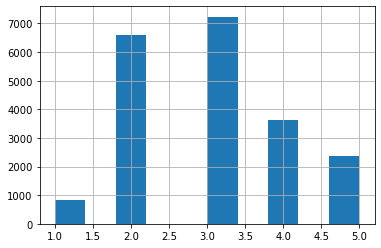

In [54]:
df['income_cat']=pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist()

In [31]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [155]:
# Now, we can do stratified sampling based on the income category.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [156]:
# Let's check the distrubtion of data in the test set for income_cat
Stratified = strat_test_set['income_cat'].value_counts()/len(strat_test_set['income_cat'])

In [157]:
# Now, let's the how it is distributed in the train set
strat_train_set['income_cat'].value_counts()/len(strat_train_set['income_cat'])

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

We can compare with the one that was plainly generated based on `train_test_split` and with overall.

In [158]:
overall = df['income_cat'].value_counts()/len(df['income_cat'])
test_train_split = test_df['income_cat'].value_counts()/len(test_df['income_cat'])
print('Overall:{} Stratified:{} Train_test_split:{}'.format(overall, Stratified, test_train_split))

Overall:3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64 Stratified:3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64 Train_test_split:3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64


One can notice the Stratified is  much closer to the overall sampple distrubtion.

In [46]:
# Now let's drop the 'income_cat' column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [47]:
strat_train_set.shape

(16512, 10)

## Discover and Visualize the Data to Gain Insights

In [48]:
#It is better to work with a copy of the data so that we won't mess up it
play_df = strat_train_set.copy()

In [49]:
play_df.shape

(16512, 10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

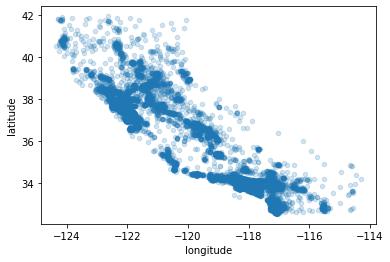

In [57]:
play_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)  # setting alpha makes it easier to visualize the places where there is a high density of data points

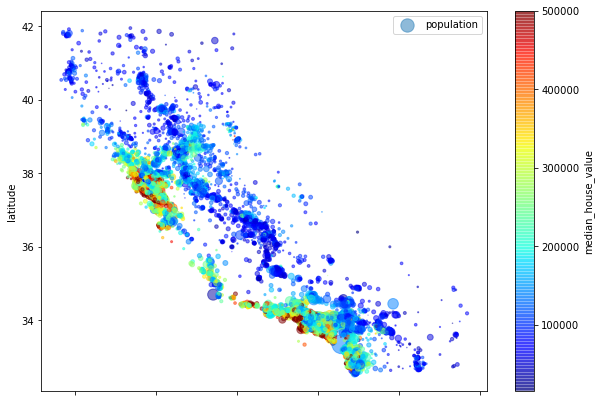

In [63]:
# Let's use district's population as a radius of circle (option s) and the price for color (option c)
play_df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.5, s = play_df['population']/100, 
             label='population', figsize=(10,7), c = 'median_house_value', cmap = plt.get_cmap('jet'),
            colorbar = True)
plt.legend()

In [163]:
corr_matrix = play_df.corr()

In [164]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.687160
rooms_per_household       0.146285
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
pop_per_household        -0.021985
population               -0.026920
bedrooms_per_household   -0.043343
longitude                -0.047432
latitude                 -0.142724
bedrooms_per_room        -0.259984
Name: median_house_value, dtype: float64

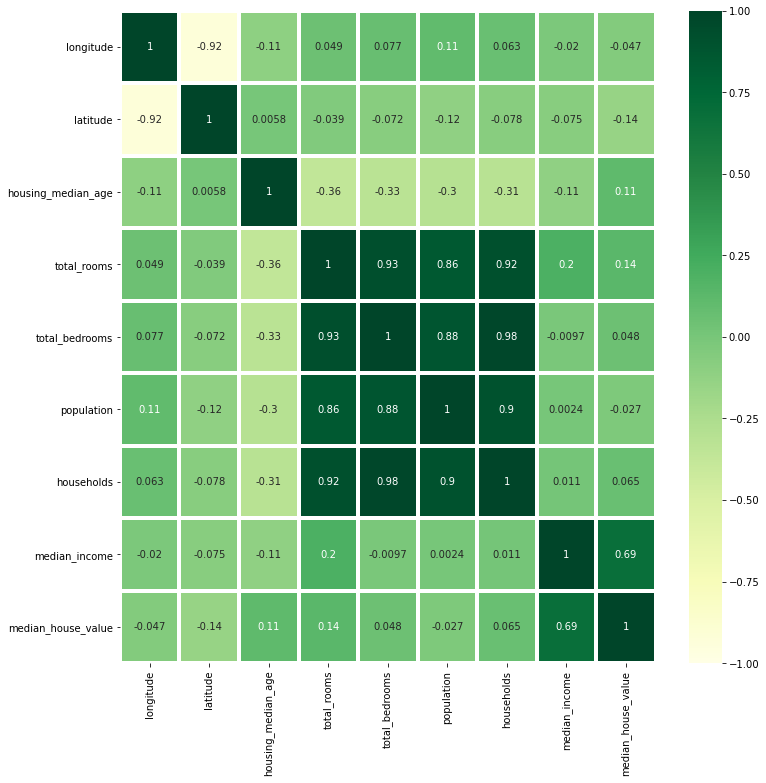

In [67]:
# a better way to visualize possible correlation is to create heatmap
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(play_df.corr(), vmin = -1, vmax = 1, annot = True, linewidth =3, cmap = 'YlGn')

We noticed that three attributes; **housing_median_age, total_rooms, median income** have noticeable correlation to the median_house_value. So, let's further analyze by plotting scattering matrix.

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

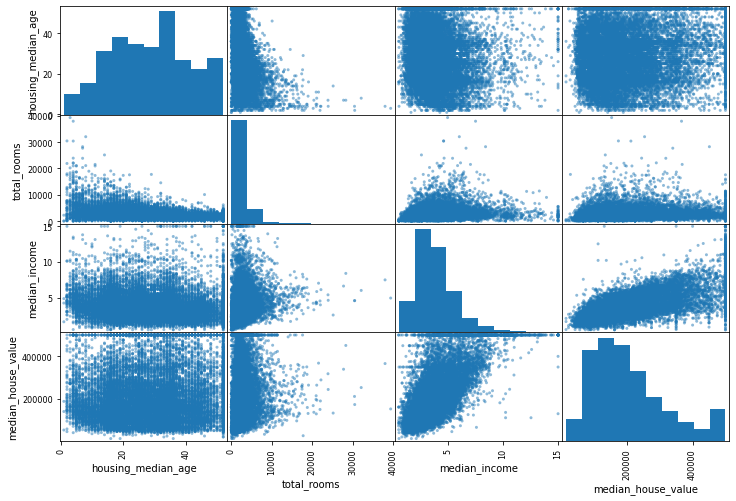

In [71]:
from pandas.plotting import scatter_matrix
attributes = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']
scatter_matrix(play_df[attributes], figsize = (12,8))

At this point it is clear that the most significant attribute to predict the median house value is median income. So, let dive a bit deeper into this.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

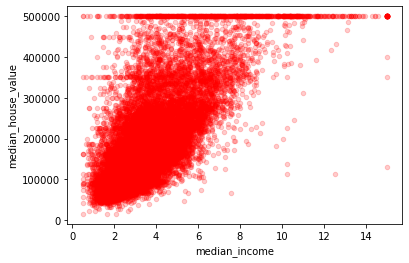

In [75]:
play_df.plot(kind='scatter', x='median_income', y='median_house_value', color='red', alpha=0.2)

A couple of features can be extracted from this plot.
1. There is upper cap in the median_house_value at 500000.
2. There are other line features also; one at 450K, 350K and probably at 220K. These are called data quirks and should be removed to prevent algorithms to learn from them.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

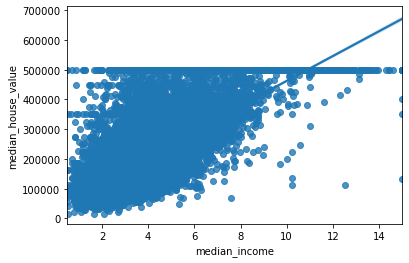

In [76]:
# let's try sns
sns.regplot(x='median_income', y='median_house_value', data = play_df)

We noticed the total rooms in the district has the noticeable correlation with the median house value. However, this is not the very useful attribute, if we don't know how many households are there. What is more useful in this sense is the no. of rooms per household, which also be related to the no. of bedrooms per household. We can also find population per household, which sounds an interesting attribute. So, we create new attributes which make more sense.

In [161]:
play_df ['rooms_per_household'] = play_df['total_rooms']/play_df['households']
play_df['bedrooms_per_room'] = play_df['total_bedrooms']/play_df['total_rooms']
play_df['pop_per_household']=play_df['population']/play_df['households']

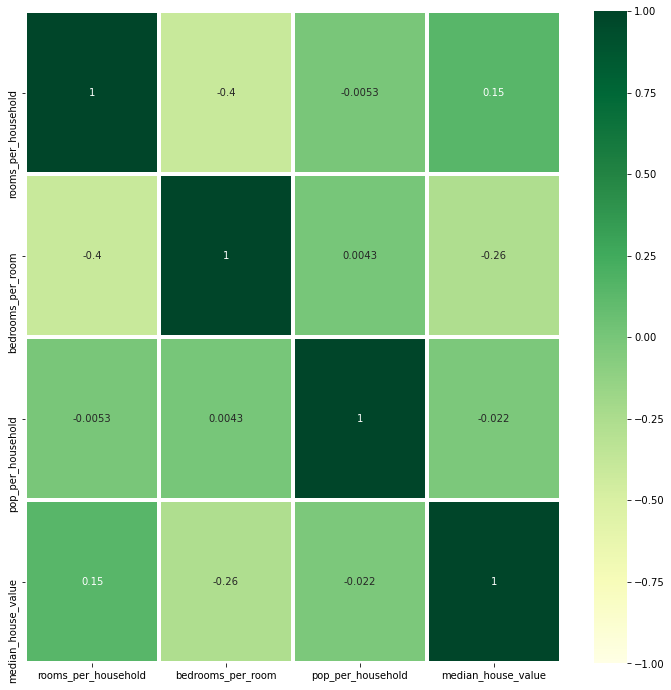

In [165]:
# Let's visualize the correlation map again
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
select_attributes = ['rooms_per_household', 'bedrooms_per_room', 'pop_per_household', 'median_house_value']
ax = sns.heatmap(play_df[select_attributes].corr(), vmin = -1, vmax = 1, annot = True, linewidth =3, cmap = 'YlGn')

Yay! We discovered that bedrooms per household is much more correlated with the median house value than the number of total rooms. In fact, houses with a lower bedroom/room ratio tend to be more expensive.

Now it's time to prepare and clean the data to train our Machine learning algorithm.

We might need to apply the transformations. So it is a good idea to seperate the attributes and the labels, as we don't want to apply the same transformation to both.

In [81]:
attributes_df = strat_train_set.drop("median_house_value", axis=1)
label_df = strat_train_set['median_house_value'].copy()

We noticed earlier that total bedrooms column has a missing values, so this should be fixed now. There are three options; use `df.dropna()` to drop the rows with missing value, `df.drop('colname', axis =1)` to drop whole attribute, or to replace the missing value `with mean, median or zero` etc.

**Scikit-Learn** provides a handy class to take care of missing values;***SimpleImputer***. 



In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') #defining an instance which fills the missing values with median

But one has to be careful because  $SimpleImputer$ evaluates the median of each attributes and which can only be computed on the numerical attributes. So, if there are any attributes with categorical data or objects, those should be removed.

In [84]:
# Let's drop the column which contains categorical data
only_num_attributes_df = attributes_df.drop('ocean_proximity', axis=1)

In [85]:
# Now we can fit the imputer instance to the training data
imputer.fit(only_num_attributes_df)

SimpleImputer(strategy='median')

In [87]:
# we can get the computed median of each of attribute by calling statistics_ instance
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [88]:
# Let's compare if it agrees with the actual median
only_num_attributes_df.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Yay! Both the values matches. One thing to remember here, when we apply SimpleImputer, we will also replace the value of other attribute with the median. Now, we can use this trained Imputer to transform the training set by replacing missing values with the learned median.

In [89]:
X = imputer.transform(only_num_attributes_df)

Here we first fit and then applied the transformation. This two process can be simplied by `fit_transform`.

Now X is ndArray. So to convert into datafram

In [92]:

final_training = pd.DataFrame(X, columns = only_num_attributes_df.columns, index = only_num_attributes_df.index)

In [93]:
# let's check if there any missing values
final_training.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Handiling Text and Categorical Attributes

So far we only covered the numberical attribute. But in the dataset, we also have one attribute which contains strings. Let's deal with that attribute.


In [100]:
catego_att_df = attributes_df[['ocean_proximity']]
catego_att_df.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

But Machine Learning algorithms prefers to work with numberical data. One way to solve this issue is to encode the different category by numbers. A simple encoding approach is Scikit-Learn's $ OrdinalEncoder$. This encoding method assigns a numerical value for each category (such as 1, 2, 3, 4, ...), which works fine in some instances such as if the category is good, better , and best. This because the ML algorithms will assume the nearest numbers are more closely related than the numbers that have greater difference. 

A better solution to the issue to use $ OneHotEncoder$. In this technique, 1 will be assigned to a category while all others categories will be assigned 0. The same method is applied to the next category. A columns will be created equal to the number of different categories in the original attribute.

In [101]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
catego_att_df1hot = cat_encoder.fit_transform(catego_att_df)

The output is a sparce matrix. Which can be converted into Numpy array as

In [102]:
catego_att_df1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Since there are five categories, so we get five columns. In case, if there are thousands categories, we would get thousands new columns, with many zeros and 1 for only one column. That's why it is good idea to get the output in terms of sparce matrix. Now if the number of categories is really large, in such case it would be good idea to try to replace that categorical attribute with a numberical attribute. For example, instead of `ocean_proximity` we can include the `distance from the ocean`

### Custom Transformation

In some cases, we might have to combine two or more of the attributes which are strongly correlated, such as `total_rooms` and `total_bedrooms` in this case. For such transformations, unfortunately, there are no built-in method or classes. But the good news is that we can built it in our own.  

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household= X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        

### Feature Scaling

In case if the attributes have different scaling, such as some attributes having numbers in the range 1 - 10000, in those cases ML algorithms may not perform well. Hence, it is necessary to scale the data before feeding into the model. There are two methods; 
$min-max scaling$ and $standardization$.

**min-max**: scaling the data into 0-1 range or by changing the hyperparameter `feature_range` any other range can also be selected.

**Standardization**: such as **StandardScaler** first it substracts the mean value (so standardization values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. It is less affected by any outliers in the data, unlike the min-max.

## Pipeline

As we noticed, there are several steps involved in the data preparation; dealing with missing values with SimpleImputer, adding two attributes with CombinedAttributesAdder, scaling the attributes, and encoding categorical attributes (**OneHotEncoder**). These steps involve many line codes with fit and transform. So to make it simple Scikit-Learn has a very useful class called **`PipeLine`** which can help with these sequences of transformations.

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),   # This simplies three steps, can be skipped from line 85
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scalar', StandardScaler())])

num_attribs_tran = num_pipeline.fit_transform(only_num_attributes_df)

We can make our process even shorter by handling the categorical and the numerical attributes together, unlike what we did above. In other words, applying the appropriate transformation to each column. The Scikit Libaray's class **`ColumnTransformer`** is a very handy tool for this purpose. **`ColumnTransformer`** requires a list of tuples, where each tuple contains a name, a transformer, and list of names of columns that the transformer should be applied to.

In [166]:
from sklearn.compose import ColumnTransformer
num_attribs = list(only_num_attributes_df)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),        # we use the pipeline defined for number attributes
    ('cat', OneHotEncoder(), cat_attribs),     # OneHot Encoder for categorical attribute
])

data_prepared = full_pipeline.fit_transform(attributes_df)


## Select Model and Train it and also evaluate on the training set

Let's start with LinearRegression

In [111]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, label_df)

LinearRegression()

In [112]:
# Let's try it out on a few instances from the training set
some_data = attributes_df.iloc[:5]
some_label = label_df.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [113]:
print("labels:", list(some_label))

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [117]:
# Let's get some evaluation indices
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(label_df, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

This is not a great score, since almost 50% of the median house value is below 180K. This means a huge prediction of error of our model.Hence the model in not satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the feature do not provide enough information to make good predictions, or that the model is not powerful enough. In case, when the model is underfitting, possible soultions are to select a more powerful model, feed the training algorithm with better features, or reduce the constraints on the model.  Since, we haven't used the regularization parameter, we can ignore the last option. 
Let's try another model ***`DecisionTreeRegressor`***

In [118]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, label_df)

DecisionTreeRegressor()

In [119]:
housing_predictions_tree = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(label_df, housing_predictions_tree)
tree_mse

0.0

Be careful! The 0 error on the training set doesn't necessarily mean that the model is perfect. This could also be due to overfitting of the data. For that, one needs to evaluate this model on the test data. But we don't want to touch the test data, unless we're confident about our model.

One way we can tackle this is split the training set into train and test sets and fit the model and test its accuracy.

In [120]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test   = train_test_split(data_prepared,label_df, test_size=0.2, random_state=42)

In [121]:
# Let's fit the model again
tree_reg1 = DecisionTreeRegressor()
tree_reg1.fit(feature_train, label_train)

DecisionTreeRegressor()

In [122]:
predictions_test = tree_reg1.predict(feature_test)
tree_mse1_test = mean_squared_error(label_test, predictions_test)
tree_mse1

4893469993.018771

In [124]:
predictions_train = tree_reg1.predict(feature_train)
mean_squared_error(label_train, predictions_train)

0.0

Now, we clearly know that the TreeRegression model has overfitted the data, as it's performance on the test data is really worse. It is also possible that high error in test data is due to its small datasize.

So a more effective way is to try **Cross-Validation** method here.

In [167]:
from sklearn.model_selection import cross_val_score
tree_reg2 = DecisionTreeRegressor()
scores = cross_val_score(tree_reg2, data_prepared, label_df, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [168]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)    

Scores: [69063.23253759 66066.06807042 69966.39112382 69767.42828297
 69415.98364486 76287.93894366 71468.46658048 71313.75368901
 76969.89457436 68951.68345767]
Mean: 70927.0840904846
Standard deviation: 3182.0389033337287


It looks the DecisionTree model performs worse than the LinearRegression. Let's do the same for LinearRegression model.

In [132]:
Lin_scores = cross_val_score(lin_reg, data_prepared, label_df, scoring='neg_mean_squared_error', cv=10)
Lin_rmse_scores = np.sqrt(-Lin_scores)

In [133]:
display_scores(Lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798343


At this point, it became clear that the DecisionTree is overfitting the data and that's why it is performing worse than the LinearRegression. But still the LinearRegression doesn't look ideal. So. let's try one more model, called ***`RandomForestRegressor`***

In [169]:
from sklearn.ensemble import RandomForestRegressor
ranF_reg = RandomForestRegressor()
ranF_reg.fit(data_prepared, label_df)

RandomForestRegressor()

In [136]:
ranF_scores = cross_val_score(ranF_reg, data_prepared, label_df, scoring='neg_mean_squared_error', cv=10)
ranF_rmse_scores = np.sqrt(-ranF_scores)
display_scores(ranF_rmse_scores)

Scores: [49739.37174335 47426.80079281 49678.872669   52474.23450081
 49950.58360969 53601.87461305 48468.58578487 48070.98435312
 52868.57592053 50429.728826  ]
Mean: 50270.96128132409
Standard deviation: 1990.8718809545853


In [170]:
ranF_pred = ranF_reg.predict(data_prepared) # check the rmse on the training data
ranF_rmse = mean_squared_error(ranF_pred, label_df)
np.sqrt(ranF_rmse)

18692.39922595942

Great! The RandomForestRegressor looks more promising, however it's score on the train set is still low. This means the model is still overfitting the data. We can still try to fit other models such as SVM. But for now let's stick with these three and now try to optimize the regularization parameter to constraint the overfitting.

We can manually tune the hyperparamters but that process is going to take forever. A handy way in such case is to use the ***GridSearchCV*** from sklearn.model_selection. It takes an estimator (like the fitting model), para_grid and other arguments which can be set as desired.


In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = [              # this is a list of dictionaries
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]   # in total there will be 18 combinations of hyperparameters

forest_reg = RandomForestRegressor()  # Our fitting model

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(data_prepared, label_df)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [142]:
# Now we can get our best combination of parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

This means the model with 30 trees and using 8 features to split the node yields the best fit. But since these were the maximum values that we selected in the param_grid, one could again search with higher values.

In [143]:
# In addition to best_params_ combination we can also get best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [145]:
# Now can also get the evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64256.90910887766 {'max_features': 2, 'n_estimators': 3}
55631.09405151284 {'max_features': 2, 'n_estimators': 10}
52626.8292224688 {'max_features': 2, 'n_estimators': 30}
61097.152499492106 {'max_features': 4, 'n_estimators': 3}
52739.70563692723 {'max_features': 4, 'n_estimators': 10}
50646.82832600815 {'max_features': 4, 'n_estimators': 30}
59015.367715882916 {'max_features': 6, 'n_estimators': 3}
52698.269700670855 {'max_features': 6, 'n_estimators': 10}
49922.042865364485 {'max_features': 6, 'n_estimators': 30}
58547.780940416604 {'max_features': 8, 'n_estimators': 3}
51763.34466439926 {'max_features': 8, 'n_estimators': 10}
49911.06475043108 {'max_features': 8, 'n_estimators': 30}
62279.51986384775 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54552.99168371126 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59377.85449827728 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52895.32521354806 {'bootstrap': False, 'max_features': 3, 'n_estimators'

The best combination, which is max_features =8, and n_estimators:30, has RMSE 49911. This is better than the plain fitting with only cross-validation (50,270). Hence, one clearly observe the improvement in the training of the model by employing hyperparameter tuning.

**GridSearchCV** method works great in case when there are relatively few combinations. But when the hyyperparameter search space is very large, it is often preferable to use **RandomizedSearchCV**. The later method works the same way as the first, but instead of running all the possible combinations, it picks the random combinations for each hyperparameter.

### Trying other estimators (or models): 

**Support Vector Machine Regressor**  with $GridSearchCV$

In [175]:
from sklearn.svm import SVR
param_grid = [
    {kernel: {'linear'}, C = [0.1, 1.0, 2.0, 4.0, 5.0]},
    {kernel:{'rbf'}, gamma = {'scale', 'auto'},C = [0.1, 1.0, 2.0, 4.0, 5.0]},
]
SVM_reg = SVR()

grid_search = GridSearchCV(SVM_reg, param_grid, cv =5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(data_prepared, label_df)


SyntaxError: invalid syntax (<ipython-input-175-d7f1e519f4bb>, line 3)

## Analyze the best model and their errors

At this point, we have figured out our best model. Then it is good idea insight on the relative importance of each attributes for making accurate predictions. In fact, we can get this information from our fitting object.

In [149]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs +extra_attribs +cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3611767636270941, 'median_income'),
 (0.14723469165234657, 'INLAND'),
 (0.10957383274417318, 'pop_per_hhold'),
 (0.07378013716563203, 'longitude'),
 (0.0648974608930159, 'bedrooms_per_room'),
 (0.06278756303241322, 'latitude'),
 (0.05910607903703677, 'rooms_per_hhold'),
 (0.04305839835549476, 'housing_median_age'),
 (0.015278951103323352, 'population'),
 (0.015260131878485635, 'households'),
 (0.014406539327695795, 'total_rooms'),
 (0.013951681277505321, 'total_bedrooms'),
 (0.009027923959018405, '<1H OCEAN'),
 (0.006221172753277061, 'NEAR OCEAN'),
 (0.0041075383586954214, 'NEAR BAY'),
 (0.00013113483479255662, 'ISLAND')]

Based on these importance scores, one can drop the attributes which have least importance such as ISLAND, and others.

### Evaluate Your System on the Test Set

Now it's time to evaluate our best model on the test set and make it ready for the deployment.

But before that we still need to transform the our test set using our pipeline object. Be careful, we only want transform(), but not the fit_transforma().

In [172]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

C:\Users\shambhu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


48182.35089180396